In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 69.0 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=83229e871ce32c87580de4ce98c60f36f0bfec923dee1c11f93a08aa87fa78f7
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 112.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.9 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=96c98b2ee48a4a9a0f2efa15b2bfc63af7912ec73d7d23d9dfb9c46934370e45
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=ef32673a1552a5ab0989e5503987ae13a251b6c8920e

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.3
    Uninstalling transformers-4.27.3:
      Successfully uninstalled transformers-4.27.3


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp39-cp39-linux_x86_64.whl size=81479 sha256=2dfe75e28f3ca4ca8545fe60857ad9e21ab442a723067640378cb193aefdc721
  Stored in directory: /root/.cache/pip/wheels/a6/28/ba/284e37010e5d3aeed5e45345b58ab8683f97bdce46c9e147f9
Successfully built jellyfish


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

In [5]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = "/content/Lenin_Selected_Works.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [6]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

In [7]:
import yake
def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

In [8]:
from rakun2 import RakunKeyphraseDetector
def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords

In [9]:
dir_path = "/content/Lenin_Selected_Works/part"
rootdir ="/content/Lenin_Selected_Works/"
part = 1
mp_lenin_bert, mp_lenin_yake, mp_lenin_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_lenin_bert[key] = get_keyword_bert(content)
                mp_lenin_yake[key] = get_keyword_yake(content)
                mp_lenin_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

27
1/chapter1


2023-03-25 05:33:36,911 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
1/chapter25
1/chapter26
1/chapter27


In [10]:
with open("mp_lenin_bert.json", "w") as outfile:
    json.dump(mp_lenin_bert, outfile)

with open("mp_lenin_yake.json", "w") as outfile:
    json.dump(mp_lenin_yake, outfile)

with open("mp_lenin_rakun.json", "w") as outfile:
    json.dump(mp_lenin_rakun, outfile)

In [11]:
mp_combined = {}
for k in mp_lenin_rakun.keys():
  k1 = set([v[0] for v in mp_lenin_bert[k]])
  k2 = set([v[0] for v in mp_lenin_yake[k]])
  k3 = set([v[0] for v in mp_lenin_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

In [12]:
# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
13
15
15
12
15
15
14
14
15
14
15
15
15
14
15
14
14
14
15
12
14
12
15


In [13]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'small', 'socialism', 'proletariat', 'readiness to resort', 'incumbents of directorships', 'Bracke in Brunswick', 'party organisation', 'reactionary slogan', 'tsarist monarchy', 'agricultural implements', 'proletarians', 'collapse', 'December', 'social development', 'revolutionary movement', 'peasant farmers', 'narodnik economists', 'dominant nation', 'sign of life', 'Russian', 'peasant farming', 'agricultural gubernias', 'migratory workers', 'armies and navies', 'commodity circulation', 'national question', 'political economy', 'congress tactics', 'karl marx und sein', 'national oppression', 'uprising', 'russian movement', 'marxist intelligentsia', 'capitalist production', 'bourgeois views', 'revolutionary character', 'bourgeois democratic', 'pacifist interpretation', 'peasant', 'democratic labour party', 'United States', 'slower the democratisation', 'first marx', 'monarchies in Russia', 'spreading', 'industrialisation', 'agricultural economics', 'social relations', 'degrade and cor

In [14]:
def get_year_to_content():
    dir_path = "/content/Lenin_Selected_Works/part"
    rootdir ="/content/Lenin_Selected_Works/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) < 1960 and int(date) > 1800:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Social_Relations_1906': ['1/chapter1'], 'Political_Economy_1906': ['1/chapter1', '1/chapter2'], 'Labor_Power_1906': ['1/chapter1'], 'Historische_Leistung_Von_Karl_Marx_1906': ['1/chapter1'], 'Marx_1906': ['1/chapter1', '1/chapter2'], 'Wholly_And_Exclusively_1906': ['1/chapter1'], 'Commodity_Production_1906': ['1/chapter1'], 'Commodity_Production_1894': ['1/chapter24'], 'Commodity_Production_1890': ['1/chapter25'], 'Commodity_Production_1897': ['1/chapter27'], 'First_Marx_1906': ['1/chapter1'], 'Readiness_To_Resort_1906': ['1/chapter1'], 'Class_Struggle_1906': ['1/chapter1', '1/chapter2'], 'Class_Struggle_1903': ['1/chapter13'], 'Class_Struggle_1871': ['1/chapter20'], 'Karl_Marx_Und_Sein_1906': ['1/chapter1'], 'Prison_In_1825-30_1906': ['1/chapter1'], 'Karl_Marx_1906': ['1/chapter1'], 'Bracke_In_Brunswick_1906': ['1/chapter1'], 'Bourgeois_Oppression_1906': ['1/chapter2'], 'Bourgeois_Economists_1906': ['1/chapter2'], 'Economic_System_1906': ['1/chapter2'], '

In [15]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [16]:
key_yr_chap_mp

defaultdict(list,
            {'Social_Relations_1906': ['1/chapter1'],
             'Political_Economy_1906': ['1/chapter1', '1/chapter2'],
             'Labor_Power_1906': ['1/chapter1'],
             'Historische_Leistung_Von_Karl_Marx_1906': ['1/chapter1'],
             'Marx_1906': ['1/chapter1', '1/chapter2'],
             'Wholly_And_Exclusively_1906': ['1/chapter1'],
             'Commodity_Production_1906': ['1/chapter1'],
             'Commodity_Production_1894': ['1/chapter24'],
             'Commodity_Production_1890': ['1/chapter25'],
             'Commodity_Production_1897': ['1/chapter27'],
             'First_Marx_1906': ['1/chapter1'],
             'Readiness_To_Resort_1906': ['1/chapter1'],
             'Class_Struggle_1906': ['1/chapter1', '1/chapter2'],
             'Class_Struggle_1903': ['1/chapter13'],
             'Class_Struggle_1871': ['1/chapter20'],
             'Karl_Marx_Und_Sein_1906': ['1/chapter1'],
             'Prison_In_1825-30_1906': ['1/chapter1'],

In [17]:
def split_sentence_from_text(key):
    file_loc = r"/content/Lenin_Selected_Works/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Social_Relations_1906
Political_Economy_1906
Labor_Power_1906
Historische_Leistung_Von_Karl_Marx_1906
Marx_1906
Wholly_And_Exclusively_1906
Commodity_Production_1906
Commodity_Production_1894
Commodity_Production_1890
Commodity_Production_1897
First_Marx_1906
Readiness_To_Resort_1906
Class_Struggle_1906
Class_Struggle_1903
Class_Struggle_1871
Karl_Marx_Und_Sein_1906
Prison_In_1825-30_1906
Karl_Marx_1906
Bracke_In_Brunswick_1906
Bourgeois_Oppression_1906
Bourgeois_Economists_1906
Economic_System_1906
Insecurity_Of_Existence_1906
Scale_Production_1906
Scale_Production_1905
Shown_The_Proletariat_1906
Bourgeois_Science_1906
Capitalist_1906
Philosophical_Materialism_1906
Marxism_1905
Capitalist_Society_1906
International_Socialist_1905
Marxist_1905
Marxist_1915
Agriculture_1890
Bourgeois_Views_1905
Time_Orthodox_Marxist_1905
Labour_Movement_1905
Revisionism_1905
Revisionists_1905
Bourgeois_World_1905
Socialist_Movement_1905
Class_1905
Petty_Bourgeois_1867
Narodnik_1867
Russian_Disciples_186

In [18]:
with open("mp_key_doc_lenin.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [19]:
url = 'https://en.wikipedia.org/wiki/Vladimir_Lenin'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'Childhood:_1870–1887', 'University_and_political_radicalisation:_1887–1893', 'Revolutionary_activity', 'Early_activism_and_imprisonment:_1893–1900', 'Munich,_London,_and_Geneva:_1900–1905', 'Revolution_of_1905_and_its_aftermath:_1905–1914', 'First_World_War:_1914–1917', 'February_Revolution_and_the_July_Days:_1917', 'October_Revolution:_1917', "Lenin's_government", 'Organising_the_Soviet_government:_1917–1918', 'Social,_legal,_and_economic_reform:_1917–1918', 'Treaty_of_Brest-Litovsk:_1917–1918', 'Anti-Kulak_campaigns,_Cheka,_and_Red_Terror:_1918–1922', 'Civil_War_and_the_Polish–Soviet_War:_1918–1920', 'Comintern_and_world_revolution:_1919–1920', 'Famine_and_the_New_Economic_Policy:_1920–1922', 'Declining_health_and_conflict_with_Stalin:_1920–1923', 'Death_and_funeral:_1923–1924', 'Political_ideology', 'Marxism_and_Leninism', 'Democracy_and_the_national_question', 'Personal_life_and_characteristics', 'Legacy', 'Within_the_Soviet_Union', 'In_the_international_communist_m

In [20]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' or val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            print(f"{key1} {key2} {cos_scores}")

Streaming output truncated to the last 5000 lines.
Declining_health_and_conflict_with_Stalin:_1920–1923 Conference_1871 -0.04896575212478638
Declining_health_and_conflict_with_Stalin:_1920–1923 United_States_1871 -0.07637821137905121
Declining_health_and_conflict_with_Stalin:_1920–1923 Monarchist_Europe_1871 0.20659124851226807
Declining_health_and_conflict_with_Stalin:_1920–1923 Square_Kilometres_1871 -0.04896575212478638
Declining_health_and_conflict_with_Stalin:_1920–1923 Wrong_To_Object_1871 -0.04896575212478638
Declining_health_and_conflict_with_Stalin:_1920–1923 Revolutions_1871 0.17238199710845947
Declining_health_and_conflict_with_Stalin:_1920–1923 States_1871 -0.04896575212478638
Declining_health_and_conflict_with_Stalin:_1920–1923 Socialist_Revolution_1871 0.21737784147262573
Declining_health_and_conflict_with_Stalin:_1920–1923 Socialist_Revolution_1915 0.20636966824531555
Declining_health_and_conflict_with_Stalin:_1920–1923 Armies_And_Navies_1871 -0.04896575212478638
Declini

In [21]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open("mp_sim_score_lenin.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [22]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

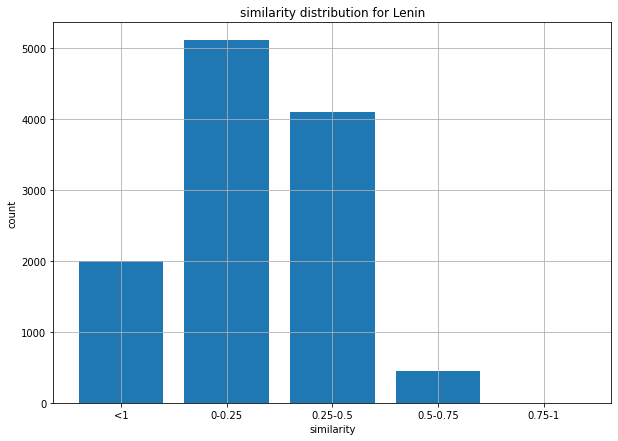

In [23]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<1"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


display_bar_plot(mp_sim_score_bar_range,"similarity distribution for Lenin","similarity","count")

In [24]:
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if year_list:
        res = max(set(year_list), key=year_list.count)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
    

    
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = 170
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
#         print(f"{date_score}    {sim_score}")
        mixed_sim_score[key] = date_score*sim_score
    
maxval = max(mixed_sim_score.values())
for k,v in mixed_sim_score.items():
    mixed_sim_score[k] = v/maxval
    
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    #if v>= 0.35:
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))
    
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in section_wise_keyword_filtered.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")

Childhood:_1870–1887  ->   ['Narodnik_Russkoye_Bogatstvo_1867', 'Europeanise_Russia_1867', 'Russian_1848', 'European_Russia_1897', 'Historische_Leistung_Von_Karl_Marx_1906']
University_and_political_radicalisation:_1887–1893  ->   ['Weaving_Industries_1890', 'Moscow_Gubernia_1890', 'Selitba_And_Vacha_1890', 'Lenin_1890', 'Capitalist_Production_1891']
Early_activism_and_imprisonment:_1893–1900  ->   ['Agricultural_1894', 'Moscow_Gubernia_1894', 'Russian_Industry_1894', 'Moscow_Industries_1894', 'Peasant_Industries_1894']
Munich,_London,_and_Geneva:_1900–1905  ->   ['Russian_Marxists_1903', 'Bourgeois_Nationalism_1903', 'National_Movements_1903', 'Tsar_1903', 'Tsarism_1903']
Revolution_of_1905_and_its_aftermath:_1905–1914  ->   ['Moscow_1905', 'Book_Moscow_1905', 'Moscow_Comrades_1905', 'Moscow_Unions_1905', 'Moscow_Uprising_1905']
First_World_War:_1914–1917  ->   ['National_Oppression_1915', 'Socialist_Revolution_1915', 'Marxist_1915', 'Dutch_Programme_1915', 'Imperialist_Economism_1915

In [25]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Moscow_Industries', 'Socialist_Movement', 'Russian_Marxists', 'Moscow_Unions', 'Lettish_Marxists', 'Revolutionary_Movement', 'National_Oppression', 'Bourgeois_Intellectualist_Wing', 'Political_Struggle', 'National_War', 'Marxist_Intelligentsia', 'Bourgeois_Views', 'Imperialist_Economism', 'Capitalist_Production', 'Bourgeois_Nationalism', 'National_Movements', 'Russian_Movement', 'Marxists', 'Historische_Leistung_Von_Karl_Marx', 'Political_Agitation', 'Moscow_Comrades', 'Socialist_Revolution', 'Moscow_Uprising', 'Tsar', 'Lenin', 'Selitba_And_Vacha', 'Agricultural', 'Book_Moscow', 'Marxism', 'Economism', 'Tsarism', 'Weaving_Industries', 'Dutch_Programme', 'Russian_Industry', 'Russian', 'Time_Orthodox_Marxist', 'Bolsheviks', 'Comrade_Plekhanov', 'European_Russia', 'Moscow_Gubernia', 'Political', 'Moscow', 'Europeanise_Russia', 'Revolutionary_Character', 'Revolutionary_Raznochintsi', 'Narodnik_Russkoye_Bogatstvo', 'Peasant_Industries', 'Revolution', 'Tsarist_Monarchy', 'War', 'Marxist'}


In [26]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)

2452
{'Sclerosis_(medicine)', 'Socialist_economics', 'L%C3%A9on_Blum', 'Barracks_communism', 'Allied_intervention_in_the_Russian_Civil_War', 'B%C3%A9la_Kun', 'Albert_Laponneraye', 'Soviet_imagery_during_the_Russo-Ukrainian_War', 'Special:BookSources/978-0-241-01132-4', 'Slovak_Soviet_Republic', 'Category:Wikipedia_indefinitely_move-protected_pages', 'Workplace_democracy', 'Enver_Hoxha', 'Alexander_Dub%C4%8Dek', 'Francesco_Guicciardini', 'Red_Army_invasion_of_Georgia', 'David_Shub', '18th_Congress_of_the_All-Union_Communist_Party_(Bolsheviks)', 'Stateless_society', 'Patriarch_Tikhon', 'Eurocommunist', 'Semyon_Budyonny', 'American_Relief_Administration', 'Palacio_de_Bellas_Artes', 'Category:Russian_atheist_writers', 'Ilich_(name)', 'Marx%E2%80%93Engels%E2%80%93Lenin_Institute', 'File:Vladimir_Lenin.jpg', 'Leonid_Krasin', 'Communism_in_Korea', 'Left-libertarian', 'H._G._Wells', 'Politburo_of_the_15th_Congress_of_the_All-Union_Communist_Party_(Bolsheviks)', 'Albert_Einstein', 'Secretariat_

In [27]:
hyperlinks_present = final_keywords & urls
print(hyperlinks_present)
len(hyperlinks_present)

{'Tsarism', 'Marxism', 'Bolsheviks', 'Tsar'}


4

In [31]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Time_Orthodox_Marxist_1905', 'Capitalist_Production_1891', 'National_Movements_1903', 'Moscow_Unions_1905', 'Bolsheviks_1915', 'Russian_Industry_1894', 'Tsarism_1903', 'Tsarist_Monarchy_1914', 'Dutch_Programme_1915', 'Peasant_Industries_1894', 'Moscow_Comrades_1905', 'National_Oppression_1915', 'Bourgeois_Nationalism_1903', 'European_Russia_1897', 'Revolution_1915', 'Russian_Movement_1901', 'Socialist_Revolution_1915', 'Marxism_1905', 'Europeanise_Russia_1867', 'Lettish_Marxists_1912', 'Bourgeois_Intellectualist_Wing_1912', 'Agricultural_1894', 'Bourgeois_Views_1905', 'National_War_1914', 'Moscow_Gubernia_1890', 'Imperialist_Economism_1915', 'Economism_1915', 'Russian_Marxists_1903', 'Lenin_1890', 'Moscow_Gubernia_1894', 'Moscow_1905', 'Tsar_1903', 'Selitba_And_Vacha_1890', 'War_1914', 'Marxist_Intelligentsia_1912', 'Marxist_1915', 'Socialist_Movement_1905', 'Revolutionary_Character_1848', 'Political_1901', 'Moscow_Uprising_1905', 'Political_Struggle_1901', 'Marxists_1912', 'Historis

In [32]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Historische_Leistung_Von_Karl_Marx_1906': ['1/chapter1'], 'Marxism_1905': ['1/chapter3'], 'Marxist_1905': ['1/chapter3'], 'Marxist_1915': ['1/chapter19'], 'Bourgeois_Views_1905': ['1/chapter3'], 'Time_Orthodox_Marxist_1905': ['1/chapter3'], 'Socialist_Movement_1905': ['1/chapter3'], 'Narodnik_Russkoye_Bogatstvo_1867': ['1/chapter4'], 'Europeanise_Russia_1867': ['1/chapter4'], 'Russian_Movement_1901': ['1/chapter5'], 'Political_1901': ['1/chapter5'], 'Political_Agitation_1901': ['1/chapter5'], 'Lenin_1890': ['1/chapter23'], 'Political_Struggle_1901': ['1/chapter5'], 'Comrade_Plekhanov_1901': ['1/chapter5'], 'Tsarism_1903': ['1/chapter7'], 'Tsar_1903': ['1/chapter7'], 'Revolution_1915': ['1/chapter19'], 'Moscow_Comrades_1905': ['1/chapter9'], 'Moscow_1905': ['1/chapter9'], 'Moscow_Uprising_1905': ['1/chapter9'], 'Book_Moscow_1905': ['1/chapter9'], 'Moscow_Unions_1905': ['1/chapter9'], 'Revolutionary_Raznochintsi_1848': ['1/chapter11'], 'Revolutionary_Character_1848': ['1/chapter11'], '

In [34]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['time orthodox marxist', 'capitalist production', 'national movements', 'moscow unions', 'bolsheviks', 'russian industry', 'tsarism', 'tsarist monarchy', 'dutch programme', 'peasant industries', 'moscow comrades', 'national oppression', 'bourgeois nationalism', 'european russia', 'revolution', 'russian movement', 'socialist revolution', 'marxism', 'europeanise russia', 'lettish marxists', 'bourgeois intellectualist wing', 'agricultural', 'bourgeois views', 'national war', 'moscow gubernia', 'imperialist economism', 'economism', 'russian marxists', 'lenin', 'moscow gubernia', 'moscow', 'tsar', 'selitba and vacha', 'war', 'marxist intelligentsia', 'marxist', 'socialist movement', 'revolutionary character', 'political', 'moscow uprising', 'political struggle', 'marxists', 'historische leistung von karl marx', 'revolutionary raznochintsi', 'weaving industries', 'political agitation', 'book moscow', 'comrade plekhanov', 'marxist', 'russian', 'moscow industries', 'revolutionary movement', '

In [35]:
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

19
53
0.3584905660377358
